In [5]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Least squares for classification

The simplest linear regression model looks like this: $$ y(\textbf{x}) = \textbf{w}^T\textbf{x} + w_o $$

For a two-class classification problem, $\textbf{x}$ belongs to class C1 if $ y(\textbf{x}) \ge 0 $ and to class C2 if $ y(\textbf{x}) < 0 $. By minimizing the sum of squared errors, we get the analytical solution of the weights: $ \textbf{w} = (X^TX)^{-1}X^TT $

#### 1.1 Balanced dataset
We create a 2 class dataset by sampling points from two Gaussian distributions.

<b>TODO</b>: Plot X1 and X2 and the decision boundary that results from the least squares solution of the weights.

In [6]:
mean1 = [1, 1]
mean2 = [2, 0]
rotation = np.matrix([[1, -1], [1, 1]])
cov1 = rotation * [[0.08, 0], [0, 0.01]] * np.transpose(rotation)
cov2 = rotation * [[0.04, 0], [0, 0.01]] * np.transpose(rotation)

x1, y1 = np.random.multivariate_normal(mean1, cov1, 100).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 100).T
X1 = np.transpose(np.vstack((x1, y1)))
X2 = np.transpose(np.vstack((x2, y2)))


In [7]:
#TODO: find weights using least squares solution
#X: 200 X 3
#W: 3 X 1
#T: 200 X 1

T = np.array([])
for line in range(X1.shape[0]):
    T = np.append(T,-1)
for line in range(X2.shape[0]):
    T = np.append(T,1)
X = np.vstack((X1,X2))
X = np.column_stack((X, np.full(X.shape[0],1.0)))
W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(T)

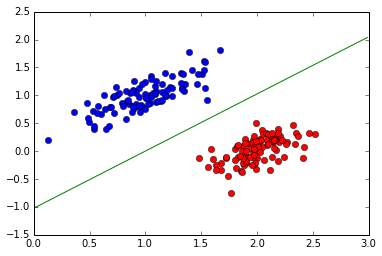

In [8]:
#TODO: plot dataset and decision boundary
plt.plot(X1[:,0],X1[:,1],"bo")
plt.plot(X2[:,0],X2[:,1],"ro")

boundary_x = np.arange(0,3,0.01)
boundary_y = [(x*(-W[0]/W[1])-W[2]/W[1]) for x in boundary_x]

plt.plot(boundary_x,boundary_y,"g-")

plt.show()

#### 1.2 Outlier dataset
We extend our initial dataset by adding examples from the second class, sampled from another Gaussian.

<b>TODO</b>: Plot X1 and X2_ext and the decision boundary that results from the least squares solution of the weights.

In [9]:
#add outliers
mean_out = [4, -1]
cov_out = [[0.1, 0], [0, 0.1]]
num_outliers = 50
x2_out, y2_out = np.random.multivariate_normal(mean_out, cov_out, num_outliers).T

x2_ext = np.hstack((x2, x2_out))
y2_ext = np.hstack((y2, y2_out))
X2_ext = np.transpose((x2_ext, y2_ext))

In [10]:
#TODO: compute least squares weights for extended dataset
T = np.array([])
for line in range(X1.shape[0]):
    T = np.append(T,-1)
for line in range(X2_ext.shape[0]):
    T = np.append(T,1)
X = np.vstack((X1,X2_ext))
X = np.column_stack((X, np.full(X.shape[0],1.0)))
W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(T)

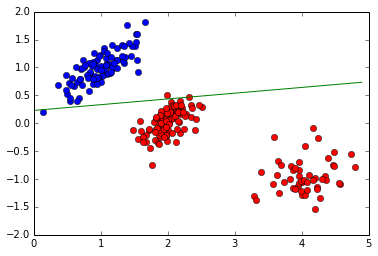

In [12]:
#TODO: plot extended dataset and decision boundary
plt.plot(X1[:,0],X1[:,1],"bo")
plt.plot(X2_ext[:,0],X2_ext[:,1],"ro")

boundary_x = np.arange(0,5,0.1)
boundary_y = [(x*(-W[0]/W[1])-W[2]/W[1]) for x in boundary_x]

plt.plot(boundary_x,boundary_y,"g-")

plt.show()

### 2. Fisher's LDA
Fisher's linear discriminant analysis is a method for dimensionality reduction that aims to find a subspace where the classes are well separated.

<b>TODO</b>: Plot X1, X2 and the line on which the projected data is best separated.

In [13]:
mean1 = [1, 1]
mean2 = [2, 0]
rotation = np.matrix([[1, -1], [1, 1]])
cov1 = rotation * [[0.08, 0], [0, 0.01]] * np.transpose(rotation)
cov2 = rotation * [[0.08, 0], [0, 0.01]] * np.transpose(rotation)

x1, y1 = np.random.multivariate_normal(mean1, cov1, 100).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 100).T

X1 = np.transpose(np.vstack((x1, y1)))
X2 = np.transpose(np.vstack((x2, y2)))

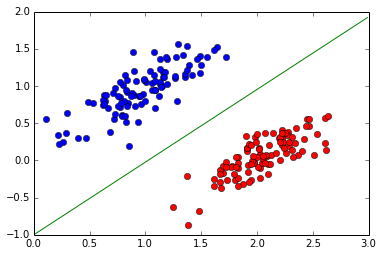

In [14]:
#TODO

m1 = np.full(2,0)
m2 = np.full(2,0)
m = np.full(2,0)
for line in X1[:,]:
    m1[0] = m1[0]+line[0]/X1.shape[0]
    m1[1] = m1[1]+line[1]/X1.shape[0]
    m[0] = m[0]+line[0]/(X1.shape[0]+X2.shape[0])
    m[1] = m[1]+line[1]/(X1.shape[0]+X2.shape[0])
for line in X2[:,]:
    m2[0] = m2[0]+line[0]/X2.shape[0]
    m2[1] = m2[1]+line[1]/X2.shape[0]
    m[0] = m[0]+line[0]/(X1.shape[0]+X2.shape[0])
    m[1] = m[1]+line[1]/(X1.shape[0]+X2.shape[0])
cov1 = np.full((2,2),0)
cov2 = np.full((2,2),0)
for line in X1[:,]:
    cov1 += np.outer((line-m1),(line-m1))
for line in X1[:,]:
    cov2 += np.outer((line-m2),(line-m2))
sw = cov1+cov2

W = np.linalg.inv(sw).dot(m2-m1)

plt.plot(X1[:,0],X1[:,1],"bo")
plt.plot(X2[:,0],X2[:,1],"ro")

boundary_x = np.arange(0,3,0.01)
boundary_y = [(x*(-W[0]/W[1])-1) for x in boundary_x]

plt.plot(boundary_x,boundary_y,"g-")

plt.show()

### 3. Perceptron
The perceptron is another example of linear discriminant model (and the simplest type of neural network) that tries to find a set of weights $ w \in \mathbb{R}^{n+1} $ such that
$ w^T \phi{(x)} \geq{0} $ for examples in class $ C1 $ and $ w^T \phi{(x)} <0 $ for examples in class $C2$, where $\phi{(x)} = [\phi{(x_0 = 1)}\ \phi{(x_1)}\ ...\ \phi{(x_n)}],\ x \in \mathbb{R}^{n} $

<b>TODO:</b> Implement the perceptron algorithm and find the sets of weights $w$ that separate the 2 datasets from section 1. Plot the datasets and the decision boundaries.

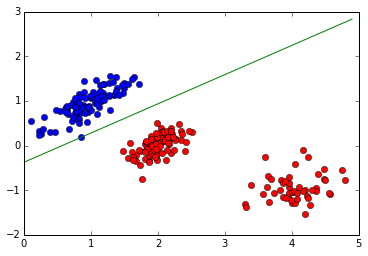

In [21]:
def getType(x):
    return np.sign(x.dot(W))

W = np.array([0,0,0])
W.fill(0)
ok = 0
line = 0
while ok<X.shape[0]:
    if getType(X[line,:])==T[line]:
        ok+=1
    else:
        W = W + T[line]*X[line,:]
        ok=0
    line = (line+1)%X.shape[0]
    
plt.plot(X1[:,0],X1[:,1],"bo")
plt.plot(X2_ext[:,0],X2_ext[:,1],"ro")

boundary_x = np.arange(0,5,0.1)
boundary_y = [(x*(-W[0]/W[1])-W[2]/W[1]) for x in boundary_x]

plt.plot(boundary_x,boundary_y,"g-")

plt.show()